# Step 3: Feature Engineering

In [1]:
# Import modules
import pandas as pd
import numpy as np
import ast

In [2]:
# Load preprocessed data
yelp_df_business = pd.read_csv('../data/processed_data/preprocessed_business.csv')
yelp_df_business.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"['Local Services', 'Mailbox Centers', 'Notarie...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
1,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","['Department Stores', 'Electronics', 'Fashion'...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."


In [3]:
processed_data = yelp_df_business.copy()
processed_data.shape

(117618, 14)

### Our target variable to define whether a business would be successfull or not
**Approach 1:** The stars can be our target variable, but solely stars cannot define the success, since if 1 review is a 5 star rating then it hasn't reached the crowd yet

**Approach 2:** The stars combined with review count can be a good scale to measure the eventual success of a business

#### Since Approach 2 is more holistic, we will combine the star rating and review count into a single metric. Multiply the star rating by the logarithm of the review count to give more weight to businesses with higher ratings and a significant number of reviews.



In [4]:
# This formula ensures that businesses with higher ratings and more reviews get a higher composite rating, reflecting a higher level of success.
processed_data["composite_rating"] = processed_data.stars * np.log(processed_data.review_count + 1)
processed_data.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,composite_rating
0,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"['Local Services', 'Mailbox Centers', 'Notarie...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",8.317766
1,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","['Department Stores', 'Electronics', 'Fashion'...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",10.974230


In [5]:
# Remove old columns
# processed_data = processed_data.drop(columns=['stars', 'review_count'])
processed_data.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'composite_rating'],
      dtype='object')

### Operational hours
The hours columns gives a dictionary with hours the business is open for each day in a week. This can be used into our modelling by computing total number of operational hours in a week

In [6]:
from datetime import datetime

def operational_hours(hours: dict = None):
    if not hours:
        return None
    operational_seconds = 0
    for day, time in hours.items():
        start_time_str, end_time_str = time.split('-')
        start_time = datetime.strptime(start_time_str, '%H:%M')
        end_time = datetime.strptime(end_time_str, '%H:%M')
        if end_time < start_time:
            operational_seconds += 24*3600 - (start_time - end_time).total_seconds()
        else:
            operational_seconds += (end_time - start_time).total_seconds()
        
    return operational_seconds/3600

In [7]:
processed_data["hours"] = processed_data["hours"].apply(lambda x: ast.literal_eval(x))
processed_data["operational_hours"] = processed_data["hours"].apply(operational_hours)
processed_data.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,composite_rating,operational_hours
0,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"['Local Services', 'Mailbox Centers', 'Notarie...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",8.317766,48.0
1,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","['Department Stores', 'Electronics', 'Fashion'...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",10.974230,100.0
2,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","['Bakeries', 'Bubble Tea', 'Coffee & Tea', 'Fo...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",17.577797,94.0
3,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","['Breweries', 'Brewpubs', 'Food']","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",11.875758,40.0
4,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","['Burgers', 'Fast Food', 'Food', 'Ice Cream & ...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...",3.891820,90.0


### Categories

In [8]:
processed_data['categories'] = processed_data.categories.apply(lambda x: ast.literal_eval(x))

In [9]:
tag_columns = pd.get_dummies(processed_data.categories.apply(pd.Series).stack()).sum(level=0)
tag_columns

/var/folders/bc/h9rkp5w90dl2mrjc0x7tltdw0000gn/T/ipykernel_45893/3913362731.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  tag_columns = pd.get_dummies(processed_data.categories.apply(pd.Series).stack()).sum(level=0)


,& Probates,3D Printing,ATV Rentals/Tours,Acai Bowls,Accessories,Accountants,Acne Treatment,Active Life,Acupuncture,Addiction Medicine,...,Wine Tasting Room,Wine Tours,Wineries,Women's Clothing,Workers Compensation Law,Wraps,Yelp Events,Yoga,Ziplining,Zoos
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117614,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117615,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117616,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
all_tags = tag_columns.astype(bool).sum(axis=0).sort_values(ascending=False)
all_tags.head(20)

Restaurants                  44676
Food                         23910
Shopping                     21053
Beauty & Spas                12038
Home Services                11760
Nightlife                    10777
Bars                          9882
Health & Medical              9821
Local Services                9351
Event Planning & Services     8137
Automotive                    8083
Sandwiches                    7623
American (Traditional)        7419
Coffee & Tea                  6186
Pizza                         6026
Fast Food                     5959
Breakfast & Brunch            5861
Active Life                   5842
American (New)                5511
Burgers                       5199
dtype: int64

##### The tags associated with less than 5% of the businesses can be omitted

In [11]:
top_tags = all_tags[all_tags > 0.05 * processed_data.shape[0]]
print(len(all_tags), len(top_tags))

1291 16


In [12]:
top_tag_columns = tag_columns[top_tags.index]
processed_data = pd.concat([processed_data, top_tag_columns], axis=1)
processed_data.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Bars,Health & Medical,Local Services,Event Planning & Services,Automotive,Sandwiches,American (Traditional),Coffee & Tea,Pizza,Fast Food
0,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,0,0,1,0,0,0,0,0,0,0
1,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,...,0,0,0,0,0,0,0,0,0,0
2,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,0,0,0,0,0,0,0,1,0,0
3,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,0,0,0,0,0,0,0,0,0,0
4,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,...,0,0,0,0,0,1,0,0,0,1


In [13]:
processed_data.dropna(inplace=True)
features = ["latitude", "longitude", "operational_hours", "is_open", "Restaurants", "Food", "Bars"]

Feature: 0, Score: -0.07261
Feature: 1, Score: -0.02516
Feature: 2, Score: -0.02965
Feature: 3, Score: 1.27856
Feature: 4, Score: 3.44847
Feature: 5, Score: 1.07171
Feature: 6, Score: 2.99228


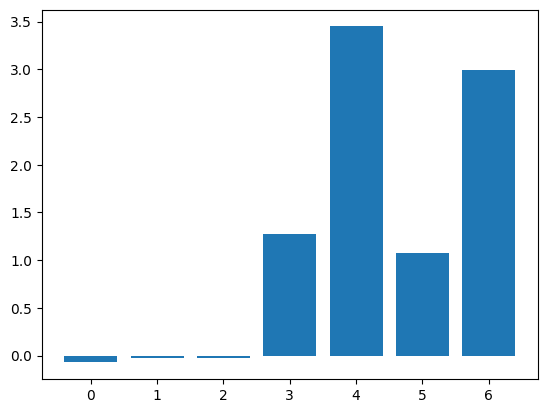

In [14]:
# linear regression feature importance
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X = processed_data[features]
y = processed_data.composite_rating
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance

importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

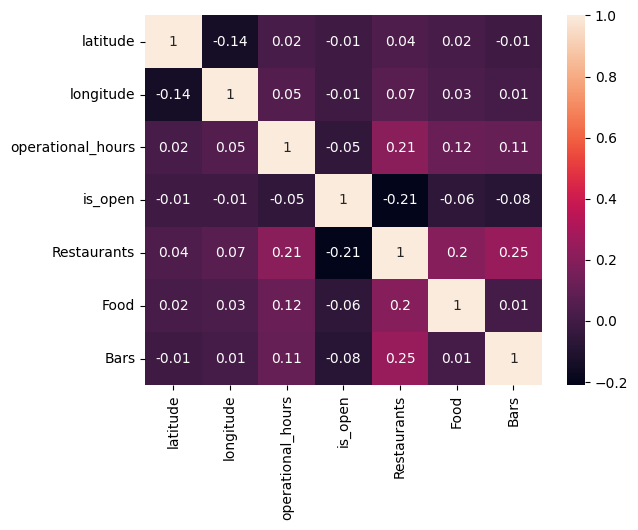

In [15]:
# Load libraries
import matplotlib.pyplot as plt
import seaborn as sns

#ploting the heatmap for correlation
ax = sns.heatmap(processed_data[features].corr().round(2), annot=True) 

# Data normalization

Data normalization ensures fair contribution of features by scaling them to similar ranges, aiding model training, reducing bias, improving convergence, and enhancing interpretability and generalization.

##### For our data we will be using Min-Max normalization

In [16]:
from sklearn.preprocessing import MinMaxScaler

X = processed_data[features]

# scale features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)

# print scaled features
print(scaled_data)

[[0.42135574 0.63460167 0.28591284 ... 0.         0.         0.        ]
 [0.17887729 0.19649745 0.59565174 ... 0.         0.         0.        ]
 [0.47517016 0.95830855 0.55991264 ... 1.         1.         0.        ]
 ...
 [0.32801034 0.71070348 0.38121712 ... 0.         0.         0.        ]
 [0.43021605 0.64281446 0.41695622 ... 0.         0.         0.        ]
 [0.00827212 0.803934   0.20847811 ... 0.         0.         0.        ]]
